## Medical Appointment No Shows
### Why do 30% of patients miss their scheduled appointments?
This topic was similar to one of the capstone projects for Rady Children's Hospital for previous MSBA cohort @Rady School of Management UCSD. I found this dataset on Kaggle, and want to replicate the capstone last year.

In [1]:
# load the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
#l load the dataset and name as df
df = pd.read_csv('KaggleV2-May-2016.csv')
df.rename(columns={'Handcap':'Handicap', 'No-show':'No_show'}, inplace=True)

#### Exploratory Data Analysis

In [4]:
# inspect the first 10 rows
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


Through inspection, we found the **Target Variable** is `No_show`. Then we do inspection on dtypes of each column:

In [5]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handicap            int64
SMS_received        int64
No_show            object
dtype: object

Then we check missing values:

In [6]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No_show           0
dtype: int64

Clearly, there is no missing value in the data, we are good to go.

We turn our target variable into a numeric variable for convenience of further analysis.

In [7]:
df['No_show_numeric'] = df.No_show.map({'No':0,'Yes':1})

We drop unique `identifier` and unique `appointmentID` from `df`.

In [8]:
df.drop(['PatientId','AppointmentID'], axis = 1, inplace=True)

(array([7.431e+03, 5.822e+03, 5.497e+03, 4.508e+03, 5.609e+03, 5.810e+03,
        5.206e+03, 4.228e+03, 5.989e+03, 6.017e+03, 5.913e+03, 5.556e+03,
        5.905e+03, 6.577e+03, 4.590e+03, 6.107e+03, 5.360e+03, 4.273e+03,
        2.866e+03, 2.442e+03, 1.969e+03, 1.417e+03, 7.190e+02, 4.740e+02,
        1.960e+02, 3.500e+01, 6.000e+00, 0.000e+00, 0.000e+00, 5.000e+00]),
 array([ -1.        ,   2.86666667,   6.73333333,  10.6       ,
         14.46666667,  18.33333333,  22.2       ,  26.06666667,
         29.93333333,  33.8       ,  37.66666667,  41.53333333,
         45.4       ,  49.26666667,  53.13333333,  57.        ,
         60.86666667,  64.73333333,  68.6       ,  72.46666667,
         76.33333333,  80.2       ,  84.06666667,  87.93333333,
         91.8       ,  95.66666667,  99.53333333, 103.4       ,
        107.26666667, 111.13333333, 115.        ]),
 <a list of 30 Patch objects>)

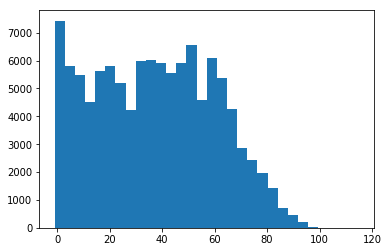

In [9]:
plt.hist(data=df, x='Age', bins=30)

It seemed that we have people over 115 years old. This is quite uncommon, but could happen in reality. We decided not drop those observation(s).

We then take a look at the distribution of Shows or No Shows in the target variable:

In [10]:
df.No_show.value_counts()

No     88208
Yes    22319
Name: No_show, dtype: int64

Turns out that around 20% patients did not show up.

In [11]:
def probcalc(df, variable):
    temp = pd.crosstab(index=df[variable],columns=df['No_show']).reset_index()
    temp['ProbNoShow'] = temp['Yes'] / (temp['No'] + temp['Yes'])
    return temp[[variable, 'ProbNoShow']]

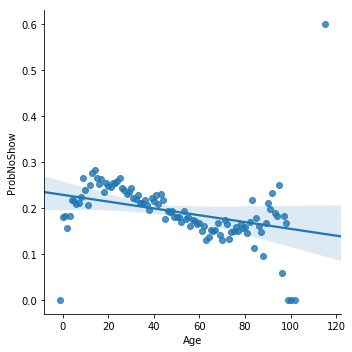

In [12]:
sns.lmplot(data = probcalc(df, 'Age'), x = 'Age', y = 'ProbNoShow', fit_reg=True)

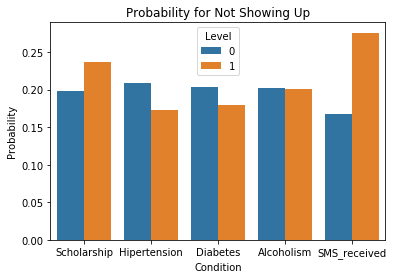

In [13]:
plotdf = pd.DataFrame(columns=['No_show_numeric','variable','value'])
for colname in ['Scholarship','Hipertension','Diabetes','Alcoholism','SMS_received']:
    temp1 = df.groupby(colname).No_show_numeric.mean().reset_index()
    temp1 = temp1.melt(value_vars=colname, id_vars= 'No_show_numeric')
    plotdf = pd.concat([plotdf, temp1])

sns.barplot(data=plotdf, x='variable', y='No_show_numeric',hue='value')
plt.title('Probability for Not Showing Up')
plt.xlabel('Condition')
plt.ylabel('Probability')
plt.legend(loc='best', title='Level')

The plot reveals that: 
* `Scholarship`, `Hipertension`, `Diabetes` and `SMS_received` may have impacts on Show/No Show
* `Alcoholism` hardly impacts the probability of Show/No show    

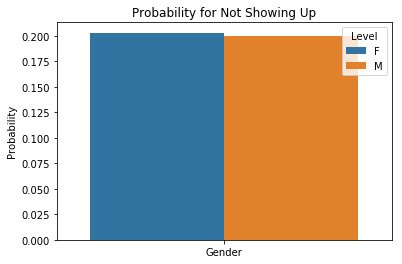

In [14]:
plotdf = df.groupby('Gender').No_show_numeric.mean().reset_index().melt(value_vars='Gender', id_vars='No_show_numeric')
sns.barplot(data=plotdf, x='variable',y='No_show_numeric',hue='value')
plt.title('Probability for Not Showing Up')
plt.xlabel('')
plt.ylabel('Probability')
plt.legend(loc='best', title='Level')

The plot reveals that:
* `Gender` is not a factor which impacts the probability of Show/No show

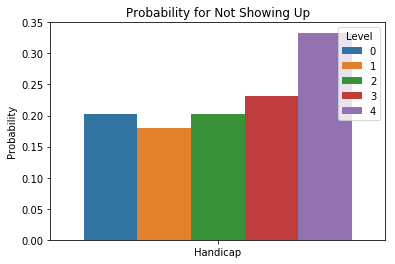

In [15]:
plotdf = df.groupby('Handicap').No_show_numeric.mean().reset_index().melt(value_vars='Handicap', id_vars='No_show_numeric')
sns.barplot(data=plotdf, x='variable',y='No_show_numeric',hue='value')
plt.title('Probability for Not Showing Up')
plt.xlabel('')
plt.ylabel('Probability')
plt.legend(loc='best', title='Level')

The level of `handicap` actually has a impact on the probability of Show/No show.

We still have two variables left without being studied. Now we take a look at these two timestamp variables.

In [16]:
from datetime import datetime

In [17]:
df.AppointmentDay = df.AppointmentDay.apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ').date())
df.ScheduledDay = df.ScheduledDay.apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ').date())

The `ScheduledDay` is the exact timestamp the appointment was scheduled. The `AppointmentDay` only contains the day, not detailed to hour, minute,seconds. We noticed some of the `ScheduledDay` are the same as the `AppointmentDay`. Although it is weird, we still keep this, but we want to calculate the gap between the day the appointment was scheduled and the appointment day itself.

To keep most of the information of timestamp, we generate three new variables `month`, `day` and `weekday` of the `AppointmentDay`

In [18]:
df['month'] = df.AppointmentDay.apply(lambda x: x.month).astype('category')
df['day'] = df.AppointmentDay.apply(lambda x:x.day).astype('category')
df['weekday'] = df.AppointmentDay.apply(lambda x:x.weekday()).astype('category')

In [19]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,No_show_numeric,month,day,weekday
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,4,29,4
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,4,29,4
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,4,29,4
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,4,29,4
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,4,29,4


In [20]:
df['Timegap'] = df['AppointmentDay'] - df['ScheduledDay']
df.Timegap = df.Timegap.astype('int') / 3600 / 24 / 1000000000

(array([1.0000e+00, 4.3780e+04, 1.8029e+04, 1.1275e+04, 5.0980e+03,
        7.2490e+03, 3.1720e+03, 5.0430e+03, 3.0030e+03, 3.4990e+03,
        2.7300e+03, 2.0440e+03, 1.1830e+03, 5.4800e+02, 5.6300e+02,
        4.5900e+02, 3.8500e+02, 3.7100e+02, 6.0300e+02, 3.2200e+02,
        3.3700e+02, 2.0100e+02, 1.7400e+02, 2.9000e+01, 1.0500e+02,
        1.0700e+02, 6.1000e+01, 1.3000e+01, 6.0000e+00, 1.7000e+01,
        1.1000e+01, 1.7000e+01, 2.0000e+00, 5.0000e+00, 4.0000e+00,
        3.0000e+00, 0.0000e+00, 1.2000e+01, 0.0000e+00, 1.0000e+00,
        8.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+01, 0.0000e+00,
        1.1000e+01, 0.0000e+00, 8.0000e+00, 0.0000e+00, 2.6000e+01]),
 array([ -6. ,  -2.3,   1.4,   5.1,   8.8,  12.5,  16.2,  19.9,  23.6,
         27.3,  31. ,  34.7,  38.4,  42.1,  45.8,  49.5,  53.2,  56.9,
         60.6,  64.3,  68. ,  71.7,  75.4,  79.1,  82.8,  86.5,  90.2,
         93.9,  97.6, 101.3, 105. , 108.7, 112.4, 116.1, 119.8, 123.5,
        127.2, 130.9, 134.6, 138.3

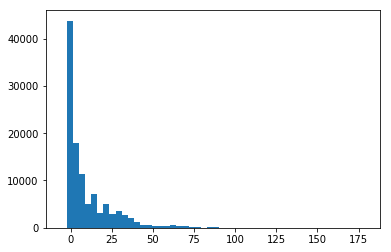

In [21]:
plt.hist(data=df, x='Timegap', bins=50)

It doesn't quite make sense to have so many people making appointment at the same date they scheduled.

#### Model Building

We separate out the target variable, and drop the original one from the dataframe for training. Then we apply stratified train test split since the rate of show/noshow is quite imbalanced.

In [22]:
target = df.No_show_numeric
df.drop(['No_show','No_show_numeric'], axis=1, inplace=True)

Also we get dummies of vairable `Handicap`

In [23]:
dummies = pd.get_dummies(df[['Handicap','Neighbourhood']])
gender = df['Gender'].map({'F':0,'M':1})

In [24]:
df = pd.concat([df.drop(['Handicap','Neighbourhood','AppointmentDay','ScheduledDay','Gender'],axis=1), dummies, gender],axis=1)

In [25]:
df.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,month,day,weekday,Timegap,...,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,Gender
0,62,0,1,0,0,0,4,29,4,0.0,...,0,0,0,0,0,0,0,0,0,0
1,56,0,0,0,0,0,4,29,4,0.0,...,0,0,0,0,0,0,0,0,0,1
2,62,0,0,0,0,0,4,29,4,0.0,...,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,4,29,4,0.0,...,0,0,0,0,0,0,0,0,0,0
4,56,0,1,1,0,0,4,29,4,0.0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'r-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='best')
    plt.ylim([0,1])

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

##### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [28]:
predict_log = cross_val_predict(log, X=df, y=target, cv=5,method='predict_proba')
predict_log = predict_log[:,1]

ROC Curve

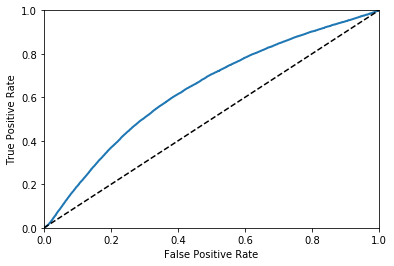

In [29]:
fpr, tpr, thresholds = roc_curve(y_score=predict_log, y_true=target)
plot_roc_curve(fpr, tpr)

Precision Recall Curve

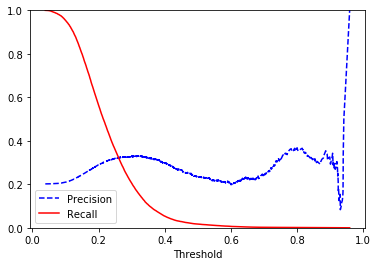

In [30]:
precision, recall, thresholds = precision_recall_curve(probas_pred=predict_log, y_true=target)
plot_precision_recall_vs_threshold(precision, recall,thresholds=thresholds)

In [31]:
log.fit(X=df, y=target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
log_predict = log.predict(df)
accuracy_score(y_pred=log_predict, y_true=target)

0.795027459353823

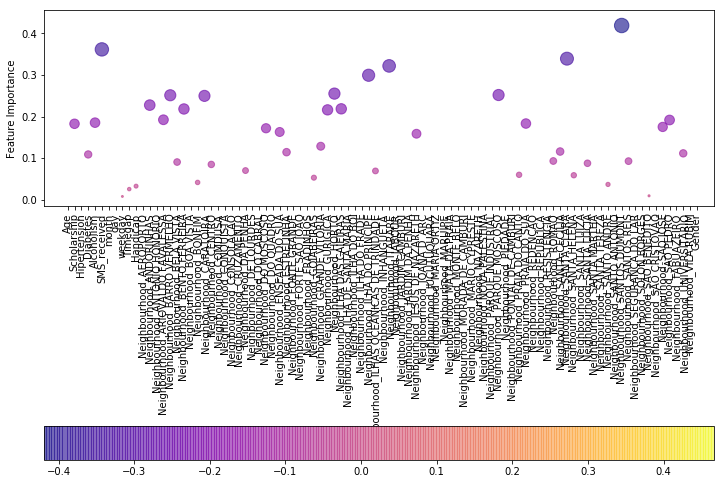

In [33]:
y = log.coef_
X = df.columns.values
f, ax = plt.subplots(figsize=(12,9))
plt.scatter(x=X, y=y, c=-y, s=y*500, alpha=.6, cmap='plasma')
plt.xticks(rotation=90)
plt.ylabel('Feature Importance')
# plt.ylim([-1,2])
plt.colorbar(orientation='horizontal', pad=0.45)

##### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [35]:
predict_rf = cross_val_predict(rf, X=df, y=target, cv=5,method='predict_proba')
predict_rf = predict_rf[:,1]

ROC Curve

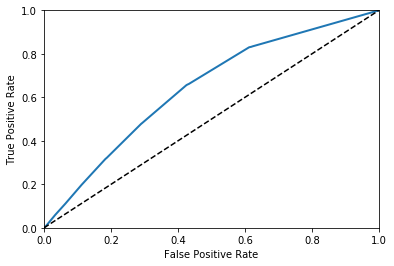

In [36]:
fpr, tpr, thresholds = roc_curve(y_score=predict_rf, y_true=target)
plot_roc_curve(fpr, tpr)

Precision Recall Curve

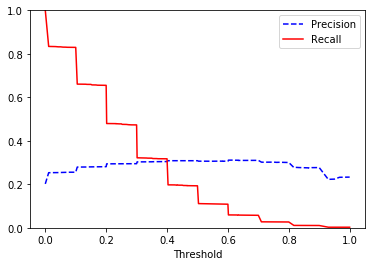

In [37]:
precision, recall, thresholds = precision_recall_curve(probas_pred=predict_rf, y_true=target)
plot_precision_recall_vs_threshold(precision, recall,thresholds=thresholds)

In [38]:
rf.fit(X=df,y=target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
rf_predict = rf.predict(df)
accuracy_score(y_pred = rf_predict, y_true=target)

0.9711111312168067

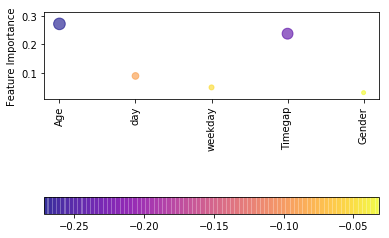

In [42]:
y = rf.feature_importances_[rf.feature_importances_ > 0.02]
X = df.columns.values[rf.feature_importances_ > 0.02]
f, ax = plt.subplots()
plt.scatter(x=X, y=y, c=-y, s=y*500, alpha=.6, cmap='plasma')
plt.xticks(rotation=90)
plt.ylabel('Feature Importance')
# plt.ylim([-1,2])
plt.colorbar(orientation='horizontal', pad=0.45)